<a href="https://colab.research.google.com/github/Loirinhm/news_classifification/blob/main/bert_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
print(tf.__version__)

2.15.0


## Gather Data

In [ ]:
# load the dataset from the json file News_Category_Dataset_v3.json from
data = pd.read_json('News_Category_Dataset_v3.json')

ValueError: Trailing data

## Explore Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
# remove the link, date, authors and short_description column
data_cleaned = data.drop(['link', 'date', 'authors'], axis=1)

In [ ]:
#show the empty lines in the [headline] column
data_cleaned.loc[data_cleaned["headline"] == ""]

,headline,category,short_description
90944,,POLITICS,
95567,,RELIGION,Let everyone not wrapped in tired and disprove...
103675,,WORLDPOST,
109100,,BUSINESS,
110153,,MEDIA,
122145,,QUEER VOICES,


In [ ]:
#show the empty lines in the [short_description] column
data_cleaned.loc[data_cleaned["short_description"] == "",]

,headline,category,short_description
20773,The Big Blue Wave,COMEDY,
21523,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,
22793,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,
32223,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,
34488,The Bechdel Test,COMEDY,
...,...,...,...
206924,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,
206939,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,
208803,Practice for International Kissing Day: 'Love ...,IMPACT,
208865,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,


In [ ]:
# remove empty rows in headline and short_description
def remove_empty_rows(df):
	return df.loc[(df['headline'] != "") & (df['short_description'] != "")]

In [ ]:
data_cleaned = remove_empty_rows(data_cleaned)

In [ ]:
#Verify that empty line was remove successfully
print((data_cleaned["headline"] == "").sum())
print((data_cleaned["short_description"] == "").sum())

0
0


In [ ]:
data_cleaned.describe()

,headline,category,short_description
count,189814,189814,189814
unique,188417,42,187020
top,Sunday Roundup,POLITICS,Welcome to the HuffPost Rise Morning Newsbrief...
freq,90,32441,192


In [ ]:
# show all the categories
data_cleaned['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [ ]:
# show category 'fifty'
data_cleaned.loc[data_cleaned['category'] == 'TASTE']

,headline,category,short_description
16173,It's Weird That American Restaurants Serve Ice...,TASTE,But why do we even have ice in our drinks in t...
16242,"Pineapple Casserole, The Southern Dish That's ...",TASTE,"It's got pineapple, cheddar and a whole lot of..."
16516,How To Actually Get A Bartender's Attention,TASTE,Plus other things they wish you knew.
16599,Diet Coke's Millennial-Inspired Makeover Leave...,TASTE,"It's not like a regular soda, it's a cool soda."
16776,We Tested The New 'Tearless' Onions To See If ...,TASTE,"Put away your goggles, people."
...,...,...,...
133523,The Most Bizarre Canned Foods From Around The ...,TASTE,There are plenty of foods that have no busines...
133595,The Answers To Every Question You've Never Ask...,TASTE,Do you love 'em or hate 'em?
133602,"Margarita Fanatics, We've Got Your Swag",TASTE,If Jimmy Buffet's Margaritaville is your happy...
133635,Easter Cheese Crescia,TASTE,I collected this recipe from scraps found in m...


In [ ]:
# change name of category 'U.S. NEWS' to 'NEWS'
data_cleaned['category'] = data_cleaned['category'].replace('U.S. NEWS', 'NEWS')

In [ ]:
# change name of category 'ARTS & CULTURE' to 'CELEBRITIES'
data_cleaned['category'] = data_cleaned['category'].replace('ARTS & CULTURE', 'CELEBRITIES')

In [ ]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'EDUCATION' if x == 'COLLEGE' else x)

In [ ]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'CULTURE & ARTS' if x == 'ARTS' else x)

In [ ]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'STYLE & BEAUTY' if x == 'STYLE' else x)

In [ ]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'FOOD & DRINK' if x == 'TASTE' else x)

In [ ]:
data_cleaned.category = data_cleaned.category.map(lambda x: 'PARENTING' if x == 'PARENTS' else x)

In [ ]:
data_cleaned = data_cleaned.loc[~data_cleaned['category'].isin(['QUEER VOICES', 'LATINO VOICES', 'THE WORLDPOST', 'WORLDPOST', 'BLACK VOICES', 'GOOD NEWS', 'WEDDINGS', 'DIVORCE'])]

In [ ]:
data_cleaned['category'].unique()

array(['NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'HOME & LIVING', 'WOMEN', 'TRAVEL', 'MONEY', 'RELIGION', 'IMPACT',
       'CELEBRITIES', 'GREEN', 'HEALTHY LIVING', 'FIFTY'], dtype=object)

In [ ]:
# show how many articles are in each category
data_cleaned['category'].value_counts()

category
POLITICS          32441
WELLNESS          17943
ENTERTAINMENT     14774
PARENTING         12346
STYLE & BEAUTY    11369
TRAVEL             9421
FOOD & DRINK       8271
HEALTHY LIVING     5265
BUSINESS           5132
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
WORLD NEWS         3297
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
GREEN              2046
CULTURE & ARTS     1926
RELIGION           1878
EDUCATION          1823
SCIENCE            1803
MONEY              1755
ENVIRONMENT        1442
NEWS               1377
CELEBRITIES        1339
FIFTY              1042
Name: count, dtype: int64

In [ ]:
#Selecting only the first 1500 rows of each category for training
data_cleaned = data_cleaned.groupby('category').head(1500)

In [ ]:
# create the training tests ('headline and short_description', 'category')
data_texts = data_cleaned['headline'] + " " + data_cleaned['short_description']
data_labels = data_cleaned['category']

In [ ]:
# make them lower case
data_texts = data_texts.str.lower()
data_labels = data_labels.str.lower()

In [ ]:
data_texts

0         over 4 million americans roll up sleeves for o...
1         american airlines flyer charged, banned for li...
2         23 of the funniest tweets about cats and dogs ...
3         the funniest tweets from parents this week (se...
4         woman who called cops on black bird-watcher lo...
                                ...                        
209502    boxer puppy and cows make friends during walk ...
209503    'black smoker' vents: new species discovered n...
209504    green activists: 50 and older if you look at s...
209505    winter weather photo contest: submit your own ...
209506    insects top newly discovered species list spec...
Length: 42700, dtype: object

### Collect Key Metrics

In [ ]:
# number of samples
len(data_texts), len(data_labels)

(42700, 42700)

In [ ]:
# number of classes
def get_num_classes(labels):
    """Gets the total number of classes.

    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)

    # Returns
        int, total number of classes.

    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes

In [ ]:
# list of each unique category in the data_labels and code it to a numbers (as a list)
labels = data_labels.unique().tolist()
labels = [i for i in range(len(labels))]

# make a dictionary of the code and the category
labels_dict = dict(zip(labels, data_labels.unique()))

In [ ]:
get_num_classes(labels)

29

In [ ]:
# number of words per sample
def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

get_num_words_per_sample(data_texts)

28.0

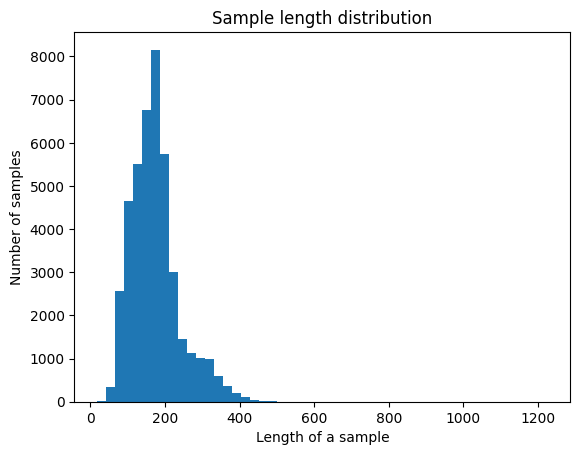

In [ ]:
# distribution of sample length
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

plot_sample_length_distribution(data_texts)

In [ ]:
# calculate ratio between the samples/words-per-sample
len(data_texts) / get_num_words_per_sample(data_texts)

1525.0

## Preparing the Data

In [ ]:
# split the data into training (train_ds) and testing (test_ds) for the bert model
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size=0.2, random_state=29)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

C:\Users\anafp\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def encoder(text):
    encoded_text = tokenizer.batch_encode_plus(
        text,
        max_length=512,
        return_attention_mask=False,
        return_token_type_ids=False,
        pad_to_max_length=True,
    )
    return np.array(encoded_text['input_ids'])

In [ ]:
train_texts = [str(text) for text in train_texts]
val_texts = [str(text) for text in val_texts]

In [ ]:
x_train = encoder(train_texts)
x_val = encoder(val_texts)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\anafp\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(data_labels)

train_labels = label_encoder.transform(train_labels)
val_labels = label_encoder.transform(val_labels)

y_train = to_categorical(train_labels, num_classes=29)
y_val = to_categorical(val_labels, num_classes=29)

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    tf.data.Dataset
        .from_tensor_slices((x_train, y_train))
        .repeat()
        .shuffle(2048)
        .batch(batch_size)
        .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    tf.data.Dataset
        .from_tensor_slices((x_val, y_val))
        .batch(batch_size)
        .prefetch(buffer_size=AUTOTUNE)
)

## Building, Training, and Evaluating Models

### BERT

In [ ]:
%pip install "tensorflow-text==2.16.*"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-text==2.16.* (from versions: none)
ERROR: No matching distribution found for tensorflow-text==2.16.*


In [ ]:
import tensorflow_hub as hub
import tensorflow_text
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
tfhub_handle_preprocess = 'https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3'
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

In [ ]:
def build_model():
    text_input = Input(shape=(512,), dtype=tf.string, name='text_input')
    preprocessor = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessor')
    encoder_inputs = preprocessor(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs["pooled_output"]
    net = Dropout(0.1)(net)
    net = Dense(29, activation='softmax', name='classifier')(net)
    model = Model(text_input, net)

    model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

    return model

In [ ]:
test_model = build_model()

RuntimeError: Op type not registered 'CaseFoldUTF8' in binary running on ROG-T. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib (e.g. `tf.contrib.resampler`), accessing should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.

In [ ]:
test_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_input (InputLayer)     [(None, 512)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             512, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

In [ ]:
n_steps = x_train.shape[0] // batch_size
history_test = test_model.fit(
    train_ds,
    steps_per_epoch=n_steps,
    epochs=10
)

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'model_2/tf_bert_model/bert/encoder/layer_._1/attention/self/MatMul' defined at (most recent call last):
    File "c:\Users\anafp\.conda\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\anafp\.conda\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\anafp\.conda\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\anafp\.conda\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\anafp\.conda\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\anafp\AppData\Local\Temp\ipykernel_14124\4118744175.py", line 2, in <module>
      history_test = test_model.fit(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\modeling_tf_utils.py", line 1207, in run_call_with_unpacked_inputs
      """
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 1234, in call
      outputs = self.bert(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\modeling_tf_utils.py", line 1207, in run_call_with_unpacked_inputs
      """
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 994, in call
      encoder_outputs = self.encoder(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 628, in call
      for i, layer_module in enumerate(self.layer):
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 634, in call
      layer_outputs = layer_module(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 527, in call
      self_attention_outputs = self.attention(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 411, in call
      self_outputs = self.self_attention(
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\anafp\.conda\envs\tf\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 315, in call
      attention_scores = tf.matmul(query_layer, key_layer, transpose_b=True)
Node: 'model_2/tf_bert_model/bert/encoder/layer_._1/attention/self/MatMul'
OOM when allocating tensor with shape[32,12,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_2/tf_bert_model/bert/encoder/layer_._1/attention/self/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_152023]